# Case study - fifa dataset

Dataset comes from Fifa 18 game, available at kaggle: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

## Table of contents:
* [1. Reading and preprocessing data](#first-bullet)
* [2. Prediction of position](#second-bullet)
* [3. Prediction of overall rating](#third-bullet)
* [4. Prediction of market values](#fourth-bullet)

## 1. Reading and preprocessing data  <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np
import pandas as pd

def convert_to_int(x):
    remove = "K€M"
    for i in remove:
        x = x.replace(i,"")
    return x

fifa_df = pd.read_csv("fifa-18-demo-player-dataset/CompleteDataset.csv", index_col=0)

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Converted the value and wage column into integer
fifa_df["Wage"] = fifa_df["Wage"].apply(lambda x: convert_to_int(x))
fifa_df["Value"] = fifa_df["Value"].apply(lambda x: convert_to_int(x))
fifa_df[["Value","Wage"]] = fifa_df[["Value","Wage"]].astype(float)

fifa_df.drop(["Photo", "Flag","Club Logo","ID"],1,inplace=True)
fifa_df.head()
fifa_df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

## 2. Prediction of position <a class="anchor" id="second-bullet"></a>

In [3]:
# Clean the Object values in the data frame, discovered there was "67 + 3" in the dataset
def clean_values(x):
    try:
        if len(x)>2:
            y = x[:2]
            return y
        else:
            return x
    except TypeError:
        return x

player_attributes_df = pd.read_csv("fifa-18-demo-player-dataset/PlayerAttributeData.csv", index_col=0)
# position_fifa_df.drop(["Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", "Special"],1,inplace=True)
player_attributes_df.drop(["ID"],1,inplace=True)
X = player_attributes_df.copy()

for col in X.columns:
    X[col] = X[col].apply(lambda x : clean_values(x))
for col in X.columns:
    X[col] = X[col].astype(float)


C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Y = fifa_df[['Preferred Positions']].copy()
Y['Preferred Positions'] = Y['Preferred Positions'].str.split().str[0]
Y.head()

,Preferred Positions
0,ST
1,RW
2,LW
3,ST
4,GK


### ZeroR classifier

In [5]:
from sklearn.model_selection import train_test_split

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 12136
validation data points: 1349
testing data points: 4496


In [6]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent', random_state=1)
model.fit(trainData, trainLabels.values.ravel())
pred = model.predict(testData)
print(pred)
score = model.score(valData, valLabels)
print(score)

['CB' 'CB' 'CB' ... 'CB' 'CB' 'CB']
0.1475166790214974


### kNN

In [7]:
from sklearn.model_selection import train_test_split

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 12136
validation data points: 1349
testing data points: 4496


Searching for best k

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kVals = range(1, 40, 2)
accuracies = []

for k in range(1, 40, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels.values.ravel())

    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))

k=1, accuracy=44.33%
k=3, accuracy=44.85%
k=5, accuracy=47.44%
k=7, accuracy=48.70%
k=9, accuracy=49.81%
k=11, accuracy=49.52%
k=13, accuracy=49.22%
k=15, accuracy=50.93%
k=17, accuracy=51.30%
k=19, accuracy=51.67%
k=21, accuracy=52.34%
k=23, accuracy=51.52%
k=25, accuracy=51.52%
k=27, accuracy=51.52%
k=29, accuracy=51.82%
k=31, accuracy=51.82%
k=33, accuracy=51.74%
k=35, accuracy=52.04%
k=37, accuracy=51.96%
k=39, accuracy=52.04%
k=21 achieved highest accuracy of 52.34% on validation data


In [9]:
# from __future__ import print_function
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels.values.ravel())
predictions = model.predict(testData)

print(model.score(testData, testLabels))

print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

0.5080071174377224
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

         CAM       0.23      0.21      0.22       274
          CB       0.71      0.84      0.77       680
         CDM       0.33      0.29      0.31       352
          CF       0.00      0.00      0.00        41
          CM       0.32      0.52      0.40       450
          GK       1.00      1.00      1.00       525
          LB       0.37      0.40      0.38       376
          LM       0.24      0.15      0.18       370
          LW       0.12      0.03      0.05       100
         LWB       0.00      0.00      0.00        34
          RB       0.32      0.26      0.29       311
          RM       0.20      0.17      0.18       314
          RW       0.05      0.01      0.02        95
         RWB       0.00      0.00      0.00        26
          ST       0.66      0.83      0.73       548

    accuracy                           0.51      4496
   macro avg       0.30      0.31 

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

print("training data points: {}".format(len(trainLabels)))
# print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 13485
testing data points: 4496


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=trainData, y=trainLabels)
clf.feature_importances_ # [ 1.,  0.,  0.]
score = clf.score(X=testData, y=testLabels) # 1.0
print(score)
# tree.export_text(clf)
# tree.plot_tree(clf)

0.44684163701067614


In [12]:
!pip install graphviz

In [13]:
from graphviz import Source

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = X.columns)
dotfile.close()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
print(__doc__)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

y_pred = clf.fit(X=trainData, y=trainLabels).predict(testData)

# Plot non-normalized confusion matrix
plot_confusion_matrix(testLabels, y_pred, classes=label_encoder.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(testLabels, y_pred, classes=label_encoder.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 68   2  23   3  53   0   6  29  11   0   2  41  10   0  26]
 [  2 477  42   1  37   0  38  12   0   2  61   3   0   3   2]
 [ 25  50  92   1 110   0  15  18   0   4  14  18   3   1   1]
 [  4   0   2   3   1   0   0   7   3   0   0   3   3   0  15]
 [ 47  32  83   3 170   0  14  35   6   1  16  26   5   2  10]
 [  0   0   0   0   1 524   0   0   0   0   0   0   0   0   0]
 [  5  63  36   0  32   0 107  24   2   4  74  17   2   7   3]
 [ 29   4  12  11  37   0  33  62  23   2  20  61  25   3  48]
 [ 11   1   2   2   7   0   3  10  13   1   0  19   9   0  22]
 [  0   1   2   1   2   0  13   3   0   4   7   0   1   0   0]
 [  2  53  19   1  26   0  72  19   0   4  88  15   3   8   1]
 [ 46   6  12   3  28   0  21  42  17   1  20  62  14   2  40]
 [ 17   1   0   4   5   0   1  14   7   1   2  15   8   0  20]
 [  1   4   3   0   1   0   5   4   0   0   4   3   0   1   0]
 [ 36   2   5

<Figure size 1500x1500 with 2 Axes>

<Figure size 1500x1500 with 2 Axes>

## 3. Prediction of overall rating <a class="anchor" id="third-bullet"></a>

In [15]:
# Clean the Object values in the data frame, discovered there was "67 + 3" in the dataset
def clean_values(x):
    try:
        if len(x)>2:
            y = x[:2]
            return y
        else:
            return x
    except TypeError:
        return x

player_attributes_df = pd.read_csv("fifa-18-demo-player-dataset/PlayerAttributeData.csv", index_col=0)
player_attributes_df.drop(["ID"],1,inplace=True)
X = player_attributes_df.copy()

for col in X.columns:
    X[col] = X[col].apply(lambda x : clean_values(x))
for col in X.columns:
    X[col] = X[col].astype(float)

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Discretisation into 5 classes

In [16]:
Y = fifa_df[['Overall']].copy()
# Y['Preferred Positions'] = Y['Preferred Positions'].str.split().str[0]
Y.head()
typ = []
weak_num = 0
average_num = 0
good_num = 0
star_num = 0
legend_num = 0

for index, row in Y.iterrows():
    if row['Overall'] < 60:
        typ.append("Weak")
        weak_num += 1
    elif row['Overall'] < 70:
        typ.append("Average")
        average_num += 1
    elif row['Overall'] < 80:
        typ.append("Good")
        good_num += 1
    elif row['Overall'] < 90:
        typ.append("Star")
        star_num += 1
    else:
        typ.append("Legend")
        legend_num += 1
Y = {'typ': typ}
Y = pd.DataFrame(Y)
print("Weak players: ", weak_num)
print("Average players: ", average_num)
print("Good players: ", good_num)
print("Stars: ", star_num)
print("Legends: ", legend_num)

Weak players:  2934
Average players:  9290
Good players:  5238
Stars:  508
Legends:  11


In [17]:
from sklearn.model_selection import train_test_split

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 12136
validation data points: 1349
testing data points: 4496


### kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

kVals = range(1, 40, 2)
accuracies = []

for k in range(1, 40, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels.values.ravel())

    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], accuracies[i] * 100))

k=1, accuracy=81.25%
k=3, accuracy=85.25%
k=5, accuracy=86.21%
k=7, accuracy=86.88%
k=9, accuracy=87.25%
k=11, accuracy=87.84%
k=13, accuracy=87.84%
k=15, accuracy=88.21%
k=17, accuracy=88.21%
k=19, accuracy=88.07%
k=21, accuracy=88.21%
k=23, accuracy=88.36%
k=25, accuracy=88.51%
k=27, accuracy=88.21%
k=29, accuracy=88.14%
k=31, accuracy=87.62%
k=33, accuracy=87.25%
k=35, accuracy=87.03%
k=37, accuracy=86.95%
k=39, accuracy=87.47%
k=25 achieved highest accuracy of 88.51% on validation data


In [19]:
# from __future__ import print_function
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels.values.ravel())
predictions = model.predict(testData)

print(model.score(testData, testLabels))

print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

0.8674377224199288
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

     Average       0.86      0.94      0.90      2363
        Good       0.86      0.82      0.84      1279
      Legend       0.00      0.00      0.00         4
        Star       0.88      0.27      0.41       133
        Weak       0.90      0.82      0.86       717

    accuracy                           0.87      4496
   macro avg       0.70      0.57      0.60      4496
weighted avg       0.87      0.87      0.86      4496



C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### ZeroR classifier

In [20]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent', random_state=1)
model.fit(trainData, trainLabels.values.ravel())
pred = model.predict(testData)
print(pred)
score = model.score(valData, valLabels)
print(score)

['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
0.5100074128984433


### Decision tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
# print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 13485
testing data points: 4496


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=trainData, y=trainLabels)
clf.feature_importances_ # [ 1.,  0.,  0.]
score = clf.score(X=testData, y=testLabels) # 1.0
print(score)
# tree.export_text(clf)
# tree.plot_tree(clf)

0.8403024911032029


In [23]:
from graphviz import Source

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = X.columns)
dotfile.close()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[2017  173    0    1  172]
 [ 181 1077    0   21    0]
 [   0    0    0    4    0]
 [   0   37    0   96    0]
 [ 129    0    0    0  588]]
Normalized confusion matrix
[[8.54e-01 7.32e-02 0.00e+00 4.23e-04 7.28e-02]
 [1.42e-01 8.42e-01 0.00e+00 1.64e-02 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00]
 [0.00e+00 2.78e-01 0.00e+00 7.22e-01 0.00e+00]
 [1.80e-01 0.00e+00 0.00e+00 0.00e+00 8.20e-01]]


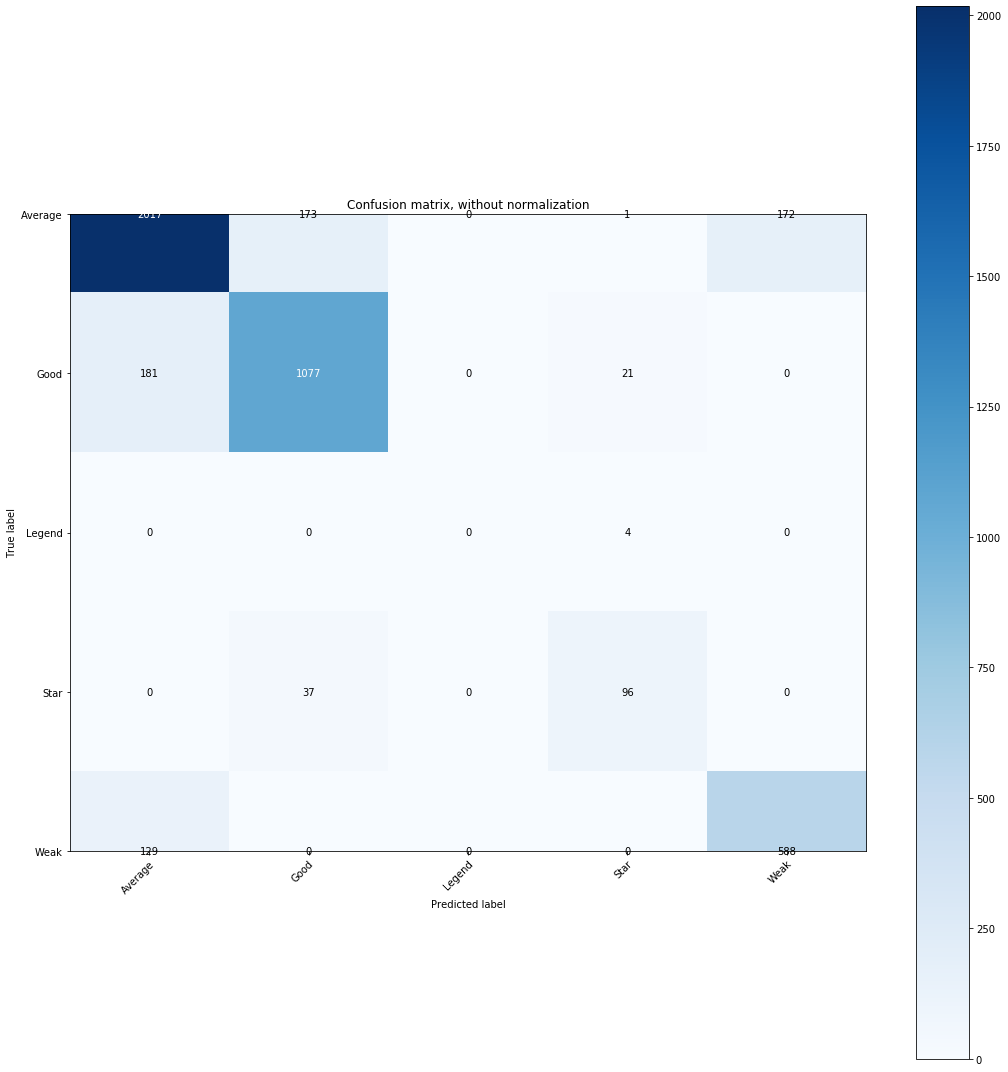

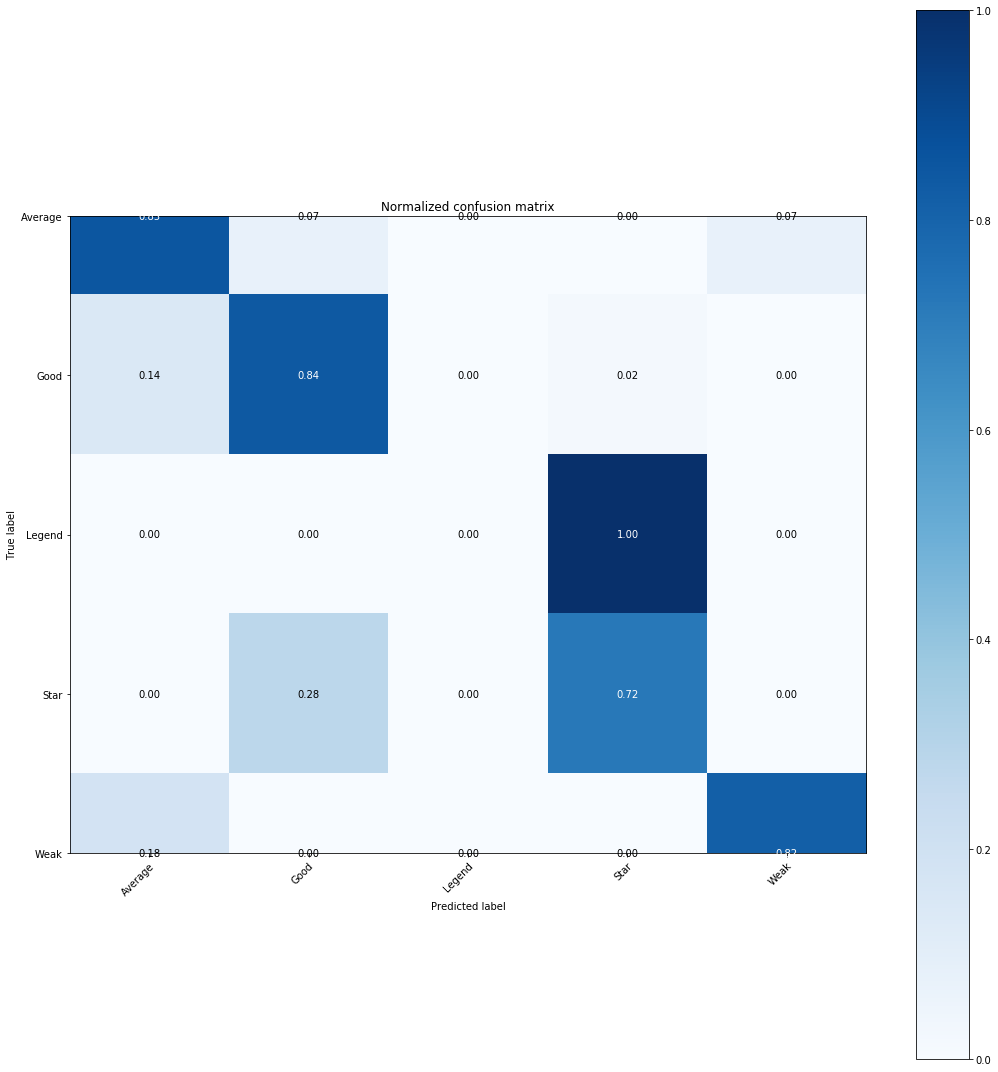

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
print(__doc__)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

y_pred = clf.fit(X=trainData, y=trainLabels).predict(testData)

# Plot non-normalized confusion matrix
plot_confusion_matrix(testLabels, y_pred, classes=label_encoder.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(testLabels, y_pred, classes=label_encoder.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 4. Prediction of market values <a class="anchor" id="fourth-bullet"></a>

In [25]:
# Clean the Object values in the data frame, discovered there was "67 + 3" in the dataset
def clean_values(x):
    try:
        if len(x)>2:
            y = x[:2]
            return y
        else:
            return x
    except TypeError:
        return x

player_attributes_df = pd.read_csv("fifa-18-demo-player-dataset/PlayerAttributeData.csv", index_col=0)
# position_fifa_df.drop(["Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", "Special"],1,inplace=True)
player_attributes_df.drop(["ID"],1,inplace=True)
X = player_attributes_df.copy()

for col in X.columns:
    X[col] = X[col].apply(lambda x : clean_values(x))
for col in X.columns:
    X[col] = X[col].astype(float)

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
Y = fifa_df[['Value']].copy()
Y.head()

,Value
0,95.5
1,105.0
2,123.0
3,97.0
4,61.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 13485
validation data points: 1349
testing data points: 4496


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Neural Network - 1. approach

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 0 	accuracy -0.06913889422225439 	est -0.07050002958846213 	loss 3590.7319900305197
iter 50 	accuracy 0.24649616517367065 	est 0.20886462696224428 	loss 2151.1858911746917
iter 100 	accuracy 0.30730844005098024 	est 0.2525219059526216 	loss 1993.685594320778
iter 150 	accuracy 0.34396407259423045 	est 0.2648072156910314 	loss 1894.473035411402
iter 200 	accuracy 0.3799962016708198 	est 0.2760588858008115 	loss 1787.4367091765694
iter 250 	accuracy 0.4094647033723533 	est 0.29119084026550324 	loss 1691.339918762361
iter 300 	accuracy 0.4346356539868038 	est 0.29954288751849156 	loss 1591.7181143637242
iter 350 	accuracy 0.4566869609781717 	est 0.31321107542495996 	loss 1594.660565209859
iter 400 	accuracy 0.4822627591269342 	est 0.341747472591037 	loss 1459.7722045969078
iter 450 	accuracy 0.48754065653533546 	est 0.3540840874230837 	loss 1400.5348121971679
iter 500 	accuracy 0.49932263759768697 	est 0.3589194338187749 	loss 1355.2692458346194
iter 550 	accuracy 0.5060390629296151 

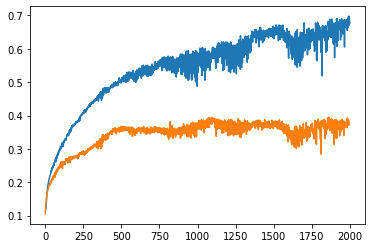

In [28]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(40,40,40), random_state=1, alpha=0.01, max_iter=1, warm_start=True)
licz=[]
accu=[]
loss=[]
test=[]
for i in range(2000):
    clf.fit(trainData, trainLabels)
    licz.append(i)
    accu.append(clf.score(trainData, trainLabels))
    loss.append(clf.loss_)
    test.append(clf.score(X=testData, y=testLabels))
    if i%50==0: #display progres, every 50 epochs
        print("iter",i,"\taccuracy",clf.score(trainData, trainLabels),"\test",clf.score(X=testData, y=testLabels),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
print(clf.score(X=testData, y=testLabels))
plt.plot(licz[5:],accu[5:], test[5:])

In [29]:
lewandowski = X.iloc[[5]]
ronaldo = X.iloc[[0]]
messi = X.iloc[[1]]
print(clf.predict(lewandowski))
print(clf.predict(ronaldo))
print(clf.predict(messi))

[83.14]
[128.17]
[127.52]


### Neural Network - 2. approach

#### Preprocessing

In [30]:
import numpy as np
import pandas as pd

K_number = 0
M_number = 0
inne = 0
def convert_to_int(x):
    remove = "K€M"
    isK = False
    isM = False
    if 'K' in x:
        isK = True
    elif 'M' in x:
        isM = True
    for i in remove:
        x = x.replace(i,"")
    if isK:
        return float(x) * 1000
    if isM:
        return float(x) * 1000000
    return float(x)

fifa_df = pd.read_csv("fifa-18-demo-player-dataset/CompleteDataset.csv", index_col=0)

print(fifa_df.loc[fifa_df['Name'] == 'G. Wojtkowiak'])
print(fifa_df.loc[fifa_df['Name'] == 'R. Lewandowski'])

               Name  Age                                            Photo  \
9257  G. Wojtkowiak   33  https://cdn.sofifa.org/48/18/players/152950.png   

     Nationality                                 Flag  Overall  Potential  \
9257      Poland  https://cdn.sofifa.org/flags/37.png       66         66   

               Club                                      Club Logo  Value  \
9257  Lechia Gdańsk  https://cdn.sofifa.org/24/18/teams/111091.png  €250K   

      ...    RB   RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
9257  ...  65.0  66.0  58.0  64.0  52.0  56.0  52.0  54.0  65.0  52.0  

[1 rows x 74 columns]
             Name  Age                                            Photo  \
5  R. Lewandowski   28  https://cdn.sofifa.org/48/18/players/188545.png   

  Nationality                                 Flag  Overall  Potential  \
5      Poland  https://cdn.sofifa.org/flags/37.png       91         91   

               Club                                  Club Logo Value

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
#Converted the value and wage column into integer
fifa_df["Wage"] = fifa_df["Wage"].apply(lambda x: convert_to_int(x))
fifa_df["Value"] = fifa_df["Value"].apply(lambda x: convert_to_int(x))
fifa_df[["Value","Wage"]] = fifa_df[["Value","Wage"]].astype(float)

fifa_df.drop(["Photo", "Flag","Club Logo","ID"],1,inplace=True)
fifa_df.head()
fifa_df.columns

print(K_number, M_number, inne)
print(fifa_df.loc[fifa_df['Name'] == 'G. Wojtkowiak'])
print(fifa_df.loc[fifa_df['Name'] == 'R. Lewandowski'])

0 0 0
               Name  Age Nationality  Overall  Potential           Club  \
9257  G. Wojtkowiak   33      Poland       66         66  Lechia Gdańsk   

         Value    Wage  Special Acceleration  ...    RB   RCB   RCM   RDM  \
9257  250000.0  3000.0     1658           65  ...  65.0  66.0  58.0  64.0   

        RF    RM    RS    RW   RWB    ST  
9257  52.0  56.0  52.0  54.0  65.0  52.0  

[1 rows x 70 columns]
             Name  Age Nationality  Overall  Potential              Club  \
5  R. Lewandowski   28      Poland       91         91  FC Bayern Munich   

        Value      Wage  Special Acceleration  ...    RB   RCB   RCM   RDM  \
5  92000000.0  355000.0     2143           79  ...  58.0  57.0  78.0  62.0   

     RF    RM    RS    RW   RWB    ST  
5  87.0  82.0  88.0  84.0  61.0  88.0  

[1 rows x 70 columns]


In [32]:
# Clean the Object values in the data frame, discovered there was "67 + 3" in the dataset
def clean_values(x):
    try:
        if len(x)>2:
            y = x[:2]
            return y
        else:
            return x
    except TypeError:
        return x

player_attributes_df = pd.read_csv("fifa-18-demo-player-dataset/PlayerAttributeData.csv", index_col=0)
# position_fifa_df.drop(["Age", "Nationality", "Overall", "Potential", "Club", "Value", "Wage", "Special"],1,inplace=True)
player_attributes_df.drop(["ID"],1,inplace=True)
X = player_attributes_df.copy()

for col in X.columns:
    X[col] = X[col].apply(lambda x : clean_values(x))
for col in X.columns:
    X[col] = X[col].astype(float)
print(len(X.index))

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17981


Removing players with very low value - outliers

In [33]:
fifa = fifa_df.copy()
n_removing = 0
for index, row in fifa.iterrows():
    if row['Value'] <= 1000.0:
        fifa = fifa.drop([index], axis=0)
        X = X.drop([index], axis=0)
        n_removing += 1
        
print("Minimal value: ", min(fifa['Value']))
print("Removing ", n_removing, " players")
print( len(X.index))
fifa.tail()

Minimal value:  10000.0
Removing  256  players
17725


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
17975,T. Käßemodel,28,Germany,46,46,FC Erzgebirge Aue,30000.0,1000.0,1174,25,...,37.0,38.0,45.0,42.0,42.0,42.0,41.0,41.0,38.0,41.0
17976,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,1000.0,755,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,J. Young,17,Scotland,46,61,Swindon Town,60000.0,1000.0,1194,66,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,J. Lundstram,18,England,46,64,Crewe Alexandra,60000.0,1000.0,1302,57,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0
17980,L. Sackey,18,Ghana,46,64,Scunthorpe United,50000.0,1000.0,1031,48,...,40.0,45.0,30.0,38.0,29.0,30.0,31.0,29.0,38.0,31.0


In [34]:
Y = fifa[['Value']].copy()
print(len(Y.index))
Y.head()

17725


,Value
0,95500000.0
1,105000000.0
2,123000000.0
3,97000000.0
4,61000000.0


Normalization

In [35]:
Y_norm=(Y-Y.mean())/Y.std()
Y = Y_norm
print(Y.mean()[0])
print(Y.std())
Y.head()

1.4044161539719074e-14
Value    1.0
dtype: float64


,Value
0,17.285848
1,19.050086
2,22.392853
3,17.564412
4,10.878878


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)

# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
# print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 13293
testing data points: 4432


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter 0 	accuracy 0.511943517803857 	est 0.5120601603696675 	loss 360.23859158894254


C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter 50 	accuracy 0.7601119351036745 	est 0.7325943079712622 	loss 129.17438969571657
iter 100 	accuracy 0.8235132942896962 	est 0.7880427924586693 	loss 102.60460238121266
iter 150 	accuracy 0.8846774624664834 	est 0.8534081995179265 	loss 68.40937374792486
iter 200 	accuracy 0.9042734431520698 	est 0.8776077877385209 	loss 66.5114540934343
iter 250 	accuracy 0.915011161864605 	est 0.8972054907949447 	loss 64.45153152056784
iter 300 	accuracy 0.9234315933073826 	est 0.9035928153292117 	loss 57.39925042638885
iter 350 	accuracy 0.9123284806682309 	est 0.890828465810925 	loss 45.61396348042926
iter 400 	accuracy 0.925255567254203 	est 0.907290543801509 	loss 51.46138872012626
iter 450 	accuracy 0.9250982471523599 	est 0.9085523286298615 	loss 53.581023601549504
iter 500 	accuracy 0.9257736746230502 	est 0.9080980607759928 	loss 54.745058650097334
iter 550 	accuracy 0.9234587233439707 	est 0.906483176205779 	loss 66.24764851610041
iter 600 	accuracy 0.9275224474285912 	est 0.911483018314

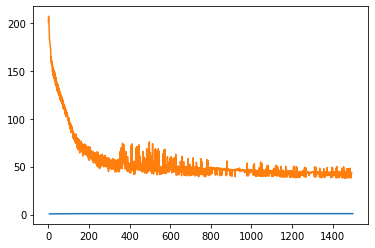

In [37]:
# 40-40-40   alpha,4k   ?25,25,15,10,5    25,25,15,10,5,5(0.833)   25,25,15,10,5,5,5   30,30,30,15,10,5 (0.76)

from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(40,40,40,40), learning_rate_init=0.003, random_state=1, max_iter=1, warm_start=True)
licz=[]
accu=[]
loss=[]
test=[]
for i in range(1500):
    clf.fit(trainData, trainLabels)
    licz.append(i)
    accu.append(clf.score(trainData, trainLabels))
    loss.append(clf.loss_)
    test.append(clf.score(X=testData, y=testLabels))
    if i%50==0: #wyświetlaj postęp obliczeń, co 50-ta epoka
        print("iter",i,"\taccuracy",clf.score(trainData, trainLabels),"\test",clf.score(X=testData, y=testLabels),"\tloss",clf.loss_)
import matplotlib.pyplot as plt
print(clf.score(X=testData, y=testLabels))
plt.plot(licz[5:],accu[5:], loss[5:])

No handles with labels found to put in legend.


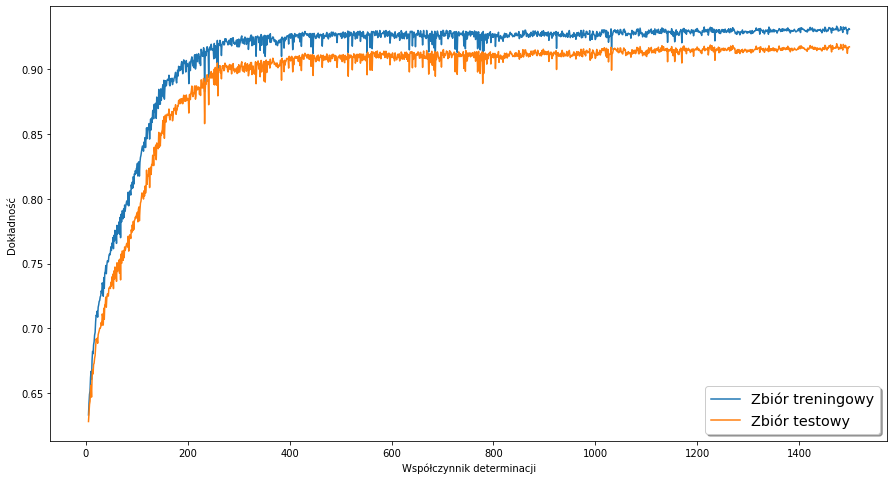

No handles with labels found to put in legend.
No handles with labels found to put in legend.


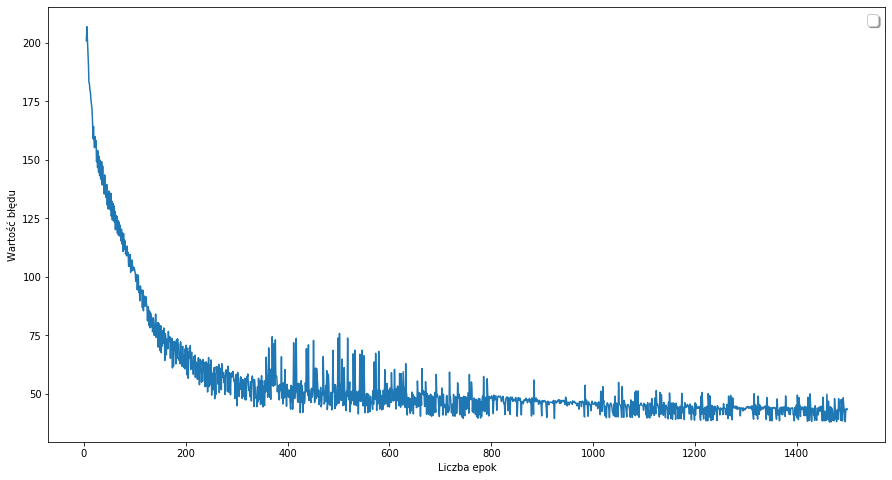

In [38]:
fig, ax = plt.subplots(figsize=(15,8))

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

ax.plot(licz[5:],accu[5:], label="Zbiór treningowy")
ax.plot(licz[5:],test[5:], label="Zbiór testowy")
ax.set_xlabel('Współczynnik determinacji')
ax.set_ylabel('Dokładność')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

fig, ax = plt.subplots(figsize=(15,8))

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.plot(licz[5:],loss[5:])
ax.set_xlabel('Liczba epok')
ax.set_ylabel('Wartość błędu')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [39]:
ronaldo = X.iloc[[0]]
messi = X.iloc[[1]]
neymar = X.iloc[[2]]
suarez = X.iloc[[3]]
neuer = X.iloc[[4]]
lewy = X.iloc[[5]]

In [40]:
Y2 = fifa[['Value']].copy()

print("Predicted values: ")
print("Ronaldo: ", (clf.predict(ronaldo)[0]*Y2.std()[0]) + Y2.mean()[0])
print("Messi: ",(clf.predict(messi)*Y2.std()) + Y2.mean())
print("Neymar: ",(clf.predict(neymar)*Y2.std()) + Y2.mean())
print("Suarez: ",(clf.predict(suarez)*Y2.std()) + Y2.mean())
print("Neuer: ",(clf.predict(neuer)*Y2.std()) + Y2.mean())
print("Lewandowski: ",(clf.predict(lewy)*Y2.std()) + Y2.mean())

Predicted values: 
Ronaldo:  1055629464.5802758
Messi:  Value    1.060997e+09
dtype: float64
Neymar:  Value    9.459761e+08
dtype: float64
Suarez:  Value    8.588435e+08
dtype: float64
Neuer:  Value    9.267150e+08
dtype: float64
Lewandowski:  Value    9.291243e+08
dtype: float64
